In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
#Loading and PreProcesssing the Image Data

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [10]:
input_shape=(28,28,1)

In [11]:
#Typecasting the training and testing datasets into float
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train = x_train/255
x_test = x_test/255
print("Shape of Training:",x_train.shape)
print("Shape of Testing:",x_test.shape)

Shape of Training: (60000, 28, 28, 1)
Shape of Testing: (10000, 28, 28, 1)


In [13]:
#Defining Models Architecture

In [14]:
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

C:\Users\hoodk\anaconda3\envs\practical\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#Training the Model

In [24]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9988 - val_loss: 0.0044
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9946 - loss: 0.0155 - val_accuracy: 0.9982 - val_loss: 0.0058
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9977 - val_loss: 0.0094
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.9965 - val_loss: 0.0090
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9965 - val_loss: 0.0128
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9968 - val_loss: 0.0119
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9949 - loss: 0.0152 - val_accuracy: 0.9953 - val_loss: 0.0157
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9960 -

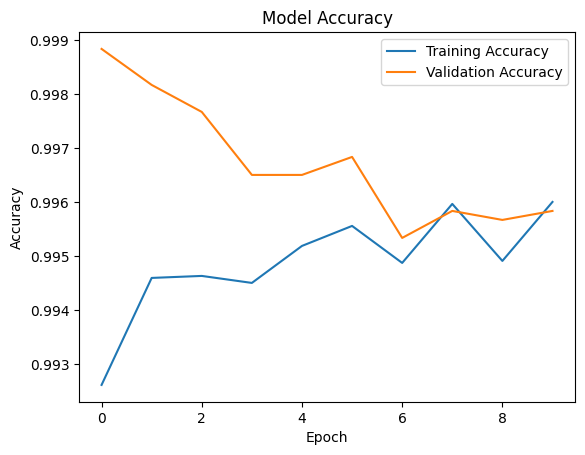

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

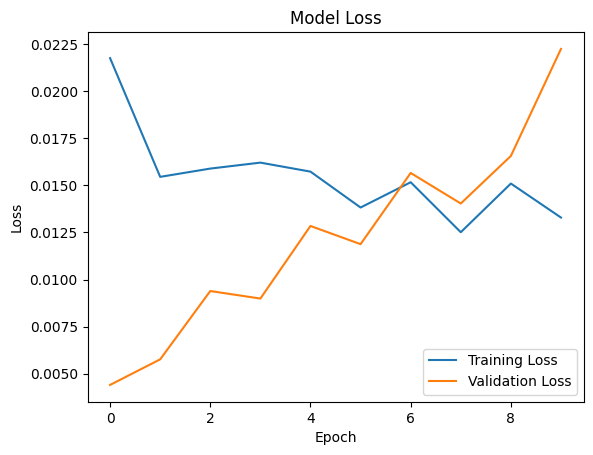

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
#Estimating Models Performance

In [28]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0809
Loss=0.081
Accuracy=0.985


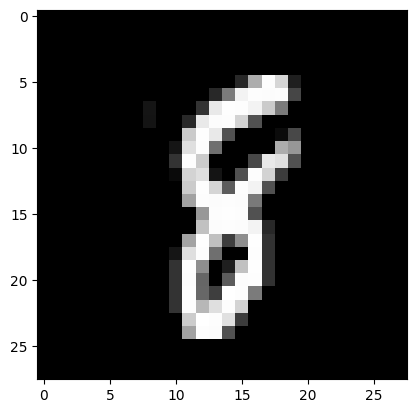

In [29]:
import random
# Showing image at position[] from dataset:
index = random.randint(0,len(x_train)-1)
image = x_train[index]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()



In [30]:
# Predicting the class of image:
image=image.reshape(1, image. shape[0], image. shape[1], image. shape[2])
predict_model = model.predict([image])
print("Pedicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Pedicted class: 8
